In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Load the dataset
file_path = "HIV_dataset_resampled.csv"
df = pd.read_csv(file_path)

In [4]:
# Prepare the data
X = df.drop('Result', axis=1)
y = df['Result']

In [5]:
# Encode categorical variables if needed
X = X.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtypes == 'object' else col)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [6]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# Train MLP model
# mlp = MLPClassifier(hidden_layer_sizes=(24,), max_iter=2000, random_state=42)
mlp = MLPClassifier(
    hidden_layer_sizes=(75, 20),
    max_iter=2000,
    early_stopping=True,           # Enables early stopping
    validation_fraction=0.1,       # 10% of training data used as validation
    n_iter_no_change=10,           # Stop if no improvement for 10 epochs
    random_state=42
)
mlp.fit(X_train_scaled, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(75, 20), max_iter=2000,
              random_state=42)

In [37]:
# Predictions and evaluation
y_pred = mlp.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

conf_matrix, class_report

(array([[54, 17],
        [23, 47]], dtype=int64),
 {'0': {'precision': 0.7012987012987013,
   'recall': 0.7605633802816901,
   'f1-score': 0.7297297297297297,
   'support': 71.0},
  '1': {'precision': 0.734375,
   'recall': 0.6714285714285714,
   'f1-score': 0.7014925373134329,
   'support': 70.0},
  'accuracy': 0.7163120567375887,
  'macro avg': {'precision': 0.7178368506493507,
   'recall': 0.7159959758551308,
   'f1-score': 0.7156111335215813,
   'support': 141.0},
  'weighted avg': {'precision': 0.7177195588099843,
   'recall': 0.7163120567375887,
   'f1-score': 0.7157112654095823,
   'support': 141.0}})

In [38]:
from sklearn.metrics import accuracy_score

y_pred = mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.72


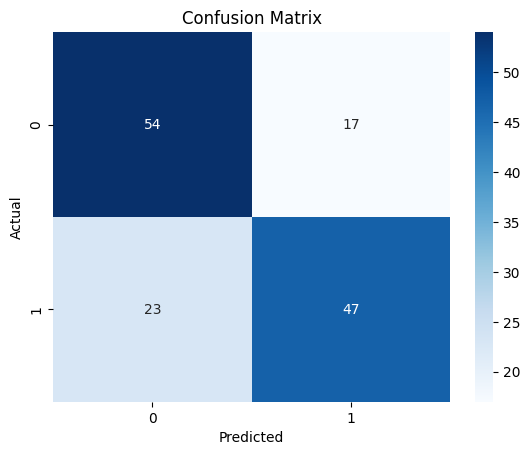

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [11]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.76      0.73        71
           1       0.73      0.67      0.70        70

    accuracy                           0.72       141
   macro avg       0.72      0.72      0.72       141
weighted avg       0.72      0.72      0.72       141



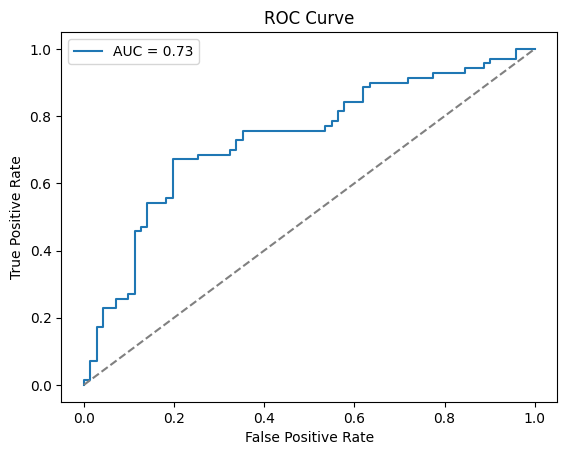

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = mlp.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
